In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn
import plotly.express as px
from matplotlib.ticker import FuncFormatter as ff
plt.style.use('fivethirtyeight')

import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob

import pendulum

In [2]:
#creates connection to mongodb
client = pymongo.MongoClient()
db = client.tweeter

In [3]:
bernie_coll = db.bernie_tweets
joe_coll = db.joe_tweets
pete_coll = db.pete_tweets
warren_coll = db.warren_tweets
amy_coll = db.amy_tweets

In [4]:
#retrieved data from mongo into a dataframe
bernie_df = pd.DataFrame(list(bernie_coll.find()))
joe_df = pd.DataFrame(list(joe_coll.find()))
pete_df = pd.DataFrame(list(pete_coll.find()))
warren_df = pd.DataFrame(list(warren_coll.find()))
amy_df = pd.DataFrame(list(amy_coll.find()))

In [5]:
# b_df = bernie_df[~bernie_df['text'].isnull()]

In [6]:
# df = b_df.set_index('date')
# df.index = pd.to_datetime(df.index)
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['wk_name'] = df.index.weekday_name

In [7]:
# df.head()

,_id,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,year,month,wk_name
date,,,,,,,,,,,,,,,
2020-02-23 23:08:28,5e544761137a410232c1773e,BernieSanders,NaN,1025,3705,23609,"We won the popular vote in Iowa, we won the Ne...",NaN,NaN,NaN,1231717490742292480,https://twitter.com/BernieSanders/status/12317...,2020,2,Sunday
2020-02-23 23:04:57,5e544761137a410232c1773f,BernieSanders,NaN,371,956,4533,"This campaign has the momentum to win, but we ...",NaN,NaN,NaN,1231716605622657025,https://twitter.com/BernieSanders/status/12317...,2020,2,Sunday
2020-02-23 22:34:47,5e544761137a410232c17740,BernieSanders,NaN,1047,5017,44742,"As president, I will support the rights of bot...",NaN,NaN,NaN,1231709011688480768,https://twitter.com/BernieSanders/status/12317...,2020,2,Sunday
2020-02-23 22:34:46,5e544761137a410232c17741,BernieSanders,NaN,4042,15101,97230,The Israeli people have the right to live in p...,NaN,NaN,NaN,1231709010430189570,https://twitter.com/BernieSanders/status/12317...,2020,2,Sunday
2020-02-23 20:20:37,5e544761137a410232c17742,BernieSanders,NaN,6105,9230,63002,Trump and his friends think they're going to w...,NaN,NaN,NaN,1231675250963832833,https://twitter.com/BernieSanders/status/12316...,2020,2,Sunday


In [8]:
def sentiment_analyser(df):
    n_df = df[~df['text'].isnull()]

    sentiment_objects = [TextBlob(tweet) for tweet in n_df['text']]
    # Create list of polarity valuesx and tweet text
    sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
    # Create dataframe containing the polarity value and tweet text
    sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

    sent_df = n_df.merge(sentiment_df, left_on='text', right_on='tweet')
    
    output_df = sent_df.set_index('date')
    output_df.index = pd.to_datetime(output_df.index)
    output_df['year'] = output_df.index.year
    output_df['month'] = output_df.index.month
    output_df['day'] = output_df.index.day
    output_df['wk_name'] = output_df.index.weekday_name
    
    return output_df

In [9]:
def plot_sentiment(df):
    #plot data
    fig, ax = plt.subplots(figsize=(8, 6))
    # Plot histogram of the polarity values
    sentiment_df.hist(bins=[-1, -0.90, -.80, -.70, -.60, -0.50, -.40 ,-.30, -0.20,-.10, 
                            0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1],
                 ax=ax,
                 color="purple")

    plt.title(title)
    return plt.show()

In [38]:
def tweets_per_day(df):
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    result = df['wk_name'].value_counts().reindex(cats).reset_index().rename(columns={'index':'weekday', 'wk_name':'num_tweets'})
    return result

In [10]:
bernie_sentiment = sentiment_analyser(bernie_df)
joe_sentiment = sentiment_analyser(joe_df)
pete_sentiment = sentiment_analyser(pete_df)
warren_sentiment = sentiment_analyser(warren_df)
amy_sentiment = sentiment_analyser(amy_df)

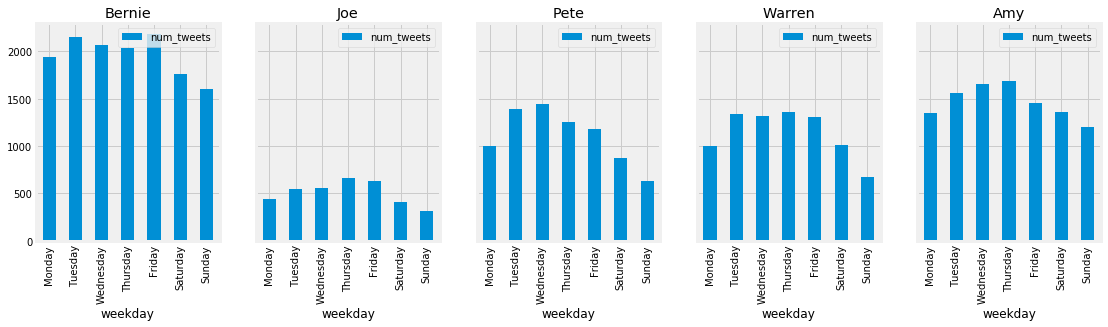

In [102]:
fig, ax = plt.subplots(1,5, figsize=(17,4), sharey=True, sharex=True)
tweets_per_day(bernie_sentiment).plot(kind='bar',x='weekday', y='num_tweets', ax=ax[0], title='Bernie')
tweets_per_day(joe_sentiment).plot(kind='bar',x='weekday', y='num_tweets', ax=ax[1], title='Joe')
tweets_per_day(pete_sentiment).plot(kind='bar',x='weekday', y='num_tweets', ax=ax[2], title='Pete')
tweets_per_day(warren_sentiment).plot(kind='bar',x='weekday', y='num_tweets', ax=ax[3], title='Warren')
tweets_per_day(amy_sentiment).plot(kind='bar',x='weekday', y='num_tweets', ax=ax[4], title='Amy')
plt.legend()
plt.show()

In [69]:
def polarity_bydate(df, yr=None, mm=None, dd=None):
    '''
    creates a polarity graph based on dates selected. 
    '''
    try:
        if yr!=None and mm!=None and dd!=None:
            query = df[(df['year']==yr)&(df['month']==mm)&(df['day']==dd)]['polarity']
        elif yr!=None and mm!=None:
            query = df[(df['year']==yr)&(df['month']==mm)]['polarity']
        elif mm!=None and dd!=None:
            query = df[(df['month']==mm)&(df['day']==mm)]['polarity']
        elif yr!=None and dd!=None:
            query = df[(df['year']==yr)&(df['day']==mm)]['polarity']
        elif yr!=None:
            query = df[df['year']==yr]['polarity']
        elif mm!=None:
            query = df[df['month']==mm]['polarity']    
        elif dd!=None:
            query = df[df['day']==mm]['polarity']   

        #plot data
        fig, ax = plt.subplots(figsize=(8, 6))

        # Plot histogram of the polarity values
        query.hist(bins=[-1, -0.90, -.80, -.70, -.60, -0.50, -.40 ,-.30, -0.20,-.10, 
                                0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1],
                     ax=ax,
                     color="purple")

        plt.title("Sentiments from Tweets from Bernie")
        return plt.show()
    
    except:
        return print('please provide a year, month, or day to filter by')

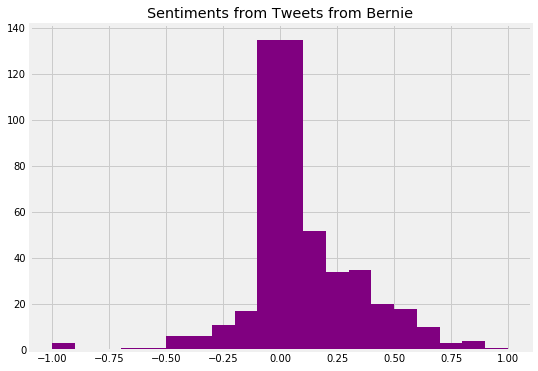

In [70]:
polarity_bydate(df=bernie_sentiment, yr=2020, mm=1)

In [71]:
sentiment_objects = [TextBlob(tweet) for tweet in b_df['text']]

In [72]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

In [73]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

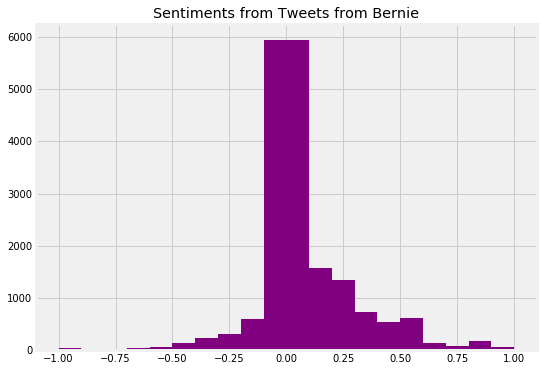

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.90, -.80, -.70, -.60, -0.50, -.40 ,-.30, -0.20,-.10, 
                        0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets from Bernie")
plt.show()

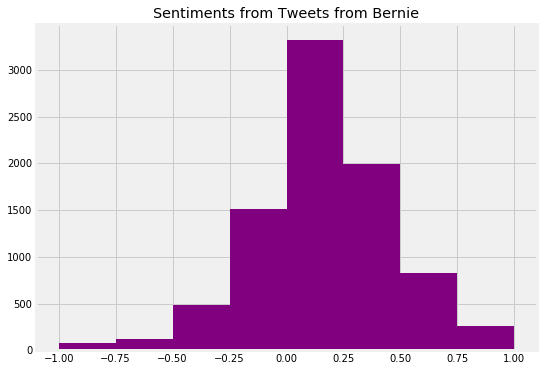

In [75]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets from Bernie")
plt.show()

In [76]:
sentiment_df.sort_values(by='polarity')

,polarity,tweet
2587,-1.0,This is simply horrific. The dehumanization of...
5561,-1.0,History will record that the Citizens United d...
3559,-1.0,U.S. participation in the Saudi-led war in Yem...
4668,-1.0,"My thoughts are with the people of Barcelona, ..."
513,-1.0,"If you have health insurance, you'd think you ..."
...,...,...
6211,1.0,"We need your help to win in CA, ND, SD, MT, NJ..."
6187,1.0,We must not succumb to bigotry. We must do wha...
10353,1.0,Great job to everyone on the #IAcaucus team!
4905,1.0,Great news! Now is the time for Keith Ellison ...


In [77]:
# sent_df = b_df.merge(sentiment_df, left_on='text', right_on='tweet')

In [78]:
# bern_df = b_df.set_index('date')

In [79]:
# bern_df.index = pd.to_datetime(bern_df.index)

In [80]:
# bern_df.head()

,_id,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
date,,,,,,,,,,,,
2020-02-23 23:08:28,5e544761137a410232c1773e,BernieSanders,NaN,1025,3705,23609,"We won the popular vote in Iowa, we won the Ne...",NaN,NaN,NaN,1231717490742292480,https://twitter.com/BernieSanders/status/12317...
2020-02-23 23:04:57,5e544761137a410232c1773f,BernieSanders,NaN,371,956,4533,"This campaign has the momentum to win, but we ...",NaN,NaN,NaN,1231716605622657025,https://twitter.com/BernieSanders/status/12317...
2020-02-23 22:34:47,5e544761137a410232c17740,BernieSanders,NaN,1047,5017,44742,"As president, I will support the rights of bot...",NaN,NaN,NaN,1231709011688480768,https://twitter.com/BernieSanders/status/12317...
2020-02-23 22:34:46,5e544761137a410232c17741,BernieSanders,NaN,4042,15101,97230,The Israeli people have the right to live in p...,NaN,NaN,NaN,1231709010430189570,https://twitter.com/BernieSanders/status/12317...
2020-02-23 20:20:37,5e544761137a410232c17742,BernieSanders,NaN,6105,9230,63002,Trump and his friends think they're going to w...,NaN,NaN,NaN,1231675250963832833,https://twitter.com/BernieSanders/status/12316...


In [81]:
# bern_df['year'] = bern_df.index.year
# bern_df['month'] = bern_df.index.month
# bern_df['wk_name'] = bern_df.index.weekday_name

In [82]:
# [TextBlob(tweet) for tweet in bern_df['text']]

[TextBlob("We won the popular vote in Iowa, we won the New Hampshire primary and we won the Nevada caucuses. Let's keep up the momentum! Join us live in Austin:"),
 TextBlob("This campaign has the momentum to win, but we cannot do it without your help. Make sure we reach our goal of 15 million calls to voters by Super Tuesday on March 3rd:"),
 TextBlob("As president, I will support the rights of both Israelis and Palestinians and do everything possible to bring peace and security to the region. 2/2"),
 TextBlob("The Israeli people have the right to live in peace and security. So do the Palestinian people. I remain concerned about the platform AIPAC provides for leaders who express bigotry and oppose basic Palestinian rights. For that reason I will not attend their conference. 1/2"),
 TextBlob("Trump and his friends think they're going to win by dividing our people up based on the color of our skin, where we were born, our religion or our sexual orientation. We're going to win because w

In [84]:
def tweet_mention_hash_plot(df, rate='M'):
    bern_df.resample(rate)[['text', 'mentions', 'hashtags']].count().plot()
    return plt.show()

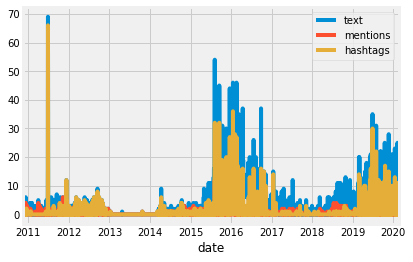

In [117]:
tweet_mention_hash_plot(bernie_sentiment, 'D')

In [87]:
# def polyplot(df):
#     n_df = df[~df['text'].isnull()]
#     show_df = n_df.set_index('date')
#     show_df.index = pd.to_datetime(show_df.index)

#     show_df.resample('M')['text'].count().plot()
#     show_df.resample('M')['mentions'].count().plot()
#     return plt.show()

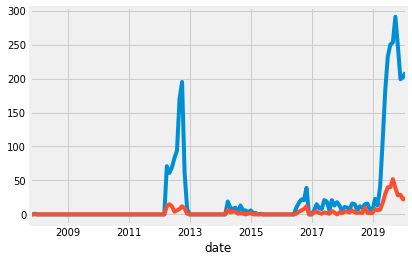

In [88]:
# polyplot(joe_df)

In [134]:
def retweet_fav_reply_plot(df, title, rate='M', figsize=(12,8)):
    fig, ax = plt.subplots(figsize=figsize)
    df.resample(rate)[['retweets', 'favorites', 'replies']].sum().plot(ax=ax)
    ax.get_yaxis().set_major_formatter(ff(lambda x, p: format(int(x), ',')))
    ax.legend(fancybox=True, frameon=True, framealpha=1, shadow=True, borderpad=1, title='Twitter Interaction')
    plt.title(title)
    return plt.show()

In [154]:
from datetime import datetime, timedelta

In [156]:
bern_ann - timedelta(days=7)

Timestamp('2019-02-18 00:00:00')

In [147]:
bernie_sentiment[bernie_sentiment.index >= bern_ann-]

,_id,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,polarity,tweet,year,month,day,wk_name
date,,,,,,,,,,,,,,,,,,
2020-02-23 23:08:28,5e544761137a410232c1773e,BernieSanders,NaN,1025,3705,23609,"We won the popular vote in Iowa, we won the Ne...",NaN,NaN,NaN,1231717490742292480,https://twitter.com/BernieSanders/status/12317...,0.343182,"We won the popular vote in Iowa, we won the Ne...",2020,2,23,Sunday
2020-02-23 23:04:57,5e544761137a410232c1773f,BernieSanders,NaN,371,956,4533,"This campaign has the momentum to win, but we ...",NaN,NaN,NaN,1231716605622657025,https://twitter.com/BernieSanders/status/12317...,0.408333,"This campaign has the momentum to win, but we ...",2020,2,23,Sunday
2020-02-23 22:34:47,5e544761137a410232c17740,BernieSanders,NaN,1047,5017,44742,"As president, I will support the rights of bot...",NaN,NaN,NaN,1231709011688480768,https://twitter.com/BernieSanders/status/12317...,0.000000,"As president, I will support the rights of bot...",2020,2,23,Sunday
2020-02-23 22:34:46,5e544761137a410232c17741,BernieSanders,NaN,4042,15101,97230,The Israeli people have the right to live in p...,NaN,NaN,NaN,1231709010430189570,https://twitter.com/BernieSanders/status/12317...,0.140693,The Israeli people have the right to live in p...,2020,2,23,Sunday
2020-02-23 20:20:37,5e544761137a410232c17742,BernieSanders,NaN,6105,9230,63002,Trump and his friends think they're going to w...,NaN,NaN,NaN,1231675250963832833,https://twitter.com/BernieSanders/status/12316...,0.470000,Trump and his friends think they're going to w...,2020,2,23,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-19 17:25:00,5e544761137a410232c185c9,BernieSanders,NaN,573,2367,11030,"Three years ago, we were told ideas like Medic...",NaN,NaN,NaN,1097909932727377921,https://twitter.com/BernieSanders/status/10979...,0.158333,"Three years ago, we were told ideas like Medic...",2019,2,19,Tuesday
2019-02-19 16:16:38,5e544761137a410232c185ca,BernieSanders,NaN,1104,3316,16242,Have you joined the team yet? Add your name to...,NaN,NaN,NaN,1097892724810960898,https://twitter.com/BernieSanders/status/10978...,0.000000,Have you joined the team yet? Add your name to...,2019,2,19,Tuesday
2019-02-19 14:30:41,5e544761137a410232c185cb,BernieSanders,NaN,843,2962,12175,The only way we will win this election and cre...,NaN,NaN,NaN,1097866062811549698,https://twitter.com/BernieSanders/status/10978...,0.266667,The only way we will win this election and cre...,2019,2,19,Tuesday


In [165]:
def retweet_fav_reply_plot(df, title, rate='M', asof=None, figsize=(12,8)):
    if asof is not None:
        df = df[df.index > (asof - timedelta(days=7))]
    
    fig, ax = plt.subplots(figsize=figsize)
    df.resample(rate)[['retweets', 'favorites', 'replies']].sum().plot(ax=ax)
    ax.get_yaxis().set_major_formatter(ff(lambda x, p: format(int(x), ',')))
    ax.legend(fancybox=True, frameon=True, framealpha=1, shadow=True, borderpad=1, title='Twitter Interaction')
    plt.title(title)
    return plt.show()

In [161]:
bern_ann= pd.to_datetime('2/19/2019')
joe_ann= pd.to_datetime('4/25/2019')
pete_ann= pd.to_datetime('1/23/2019')
warren_ann= pd.to_datetime('12/31/2018')
amy_ann= pd.to_datetime('2/10/2019')

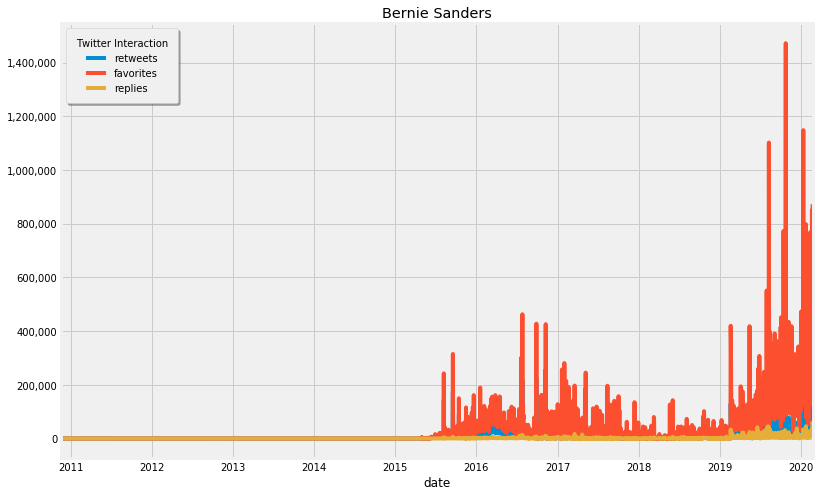

In [164]:
retweet_fav_reply_plot2(bernie_sentiment, 'Bernie Sanders', rate='D', asof=bern_ann)
retweet_fav_reply_plot(joe_sentiment, 'Joe Biden')
retweet_fav_reply_plot(pete_sentiment, 'Pete Buttigieg')
retweet_fav_reply_plot(warren_sentiment, 'Elizabeth Warren')
retweet_fav_reply_plot(amy_sentiment, 'Amy Klobuchar')

In [91]:
def polyplot(df, rate='M'):
    n_df = df[~df['text'].isnull()]
    show_df = n_df.set_index('date')
    show_df.index = pd.to_datetime(show_df.index)
    return show_df.resample(rate)['text'].count()

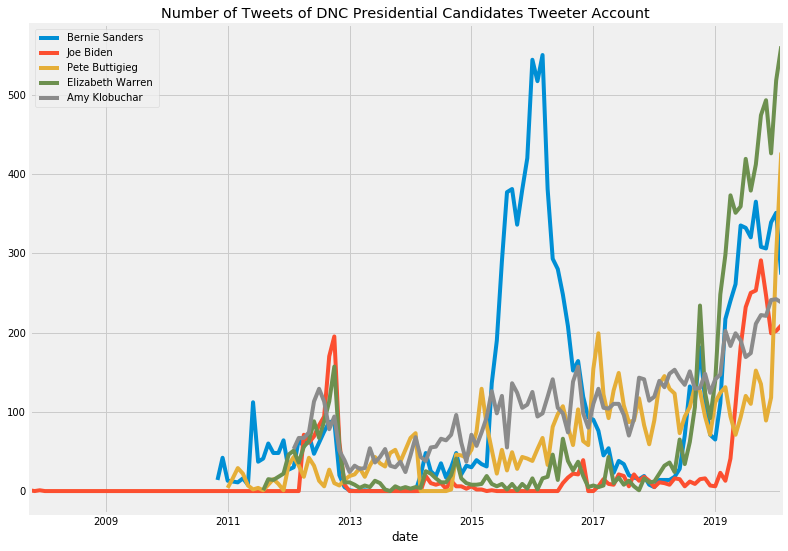

In [92]:
fig, ax = plt.subplots(figsize=(12,9))
polyplot(bernie_df).plot()
polyplot(joe_df).plot()
polyplot(pete_df).plot()
polyplot(warren_df).plot()
polyplot(amy_df).plot()
labels = ['Bernie Sanders', 'Joe Biden', 'Pete Buttigieg', 'Elizabeth Warren ', 'Amy Klobuchar']
plt.legend(labels)
plt.title('Number of Tweets of DNC Presidential Candidates Tweeter Account')
plt.show()

In [93]:
data = pd.concat([polyplot(bernie_df, rate='D'),polyplot(joe_df, rate='D'), 
                  polyplot(pete_df, rate='D'), polyplot(warren_df, rate='D'),
                  polyplot(amy_df, rate='D')], axis=1)

cols = ['bernie', 'joe', 'pete', 'warren', 'amy']
data.columns = cols

In [94]:
def plot_trend(x, y):
    title = "{} Tweets Trends".format(y.capitalize())
    fig=px.line(data, x=x, y=y, title=title)
    return fig.show()

In [109]:
plot_trend(data.index, 'warren')
plot_trend(data.index, 'joe')

In [97]:
import statsmodels.api as sm